# Machine Learning Data Processing

In [1]:
# ! pip install keras_tuner
import pandas as pd
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#import tensorflow as tf
#import keras_tuner as kt
from sklearn.pipeline import Pipeline
#from keras.layers import Dense, Dropout, Flatten, Activation
import h5py
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [78]:
f = './Resources/machine1_data.csv'
final1_df = pd.read_csv(f)
final1_df.head(2)

,date,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
0,2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C A Murphy,A J Donoghue,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C Roche,Mark Walsh,5.0,4,150,t,79.0,0,0.0


In [3]:
final1_df.shape

(140461, 18)

In [4]:
import datetime

In [77]:
final1_df['date']= pd.to_datetime(final1_df['date'])
final1_df.head(2)

,date,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
0,2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C A Murphy,A J Donoghue,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C Roche,Mark Walsh,5.0,4,150,t,79.0,0,0.0


In [72]:
#final1_df.dtypes

In [71]:
final1_df.set_index('date').head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
date,,,,,,,,,,,,,,,,,
2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C A Murphy,A J Donoghue,3.0,5,157,t,93.0,0,852.0
2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C Roche,Mark Walsh,5.0,4,150,t,79.0,0,0.0


In [73]:
#final1_df.dtypes

In [70]:
new_df = final1_df.iloc[0:120000, :]
new_df.head(2)

,date,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
0,2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C A Murphy,A J Donoghue,3.0,5,157,t,93.0,0,852.0
1,2005-06-02,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C Roche,Mark Walsh,5.0,4,150,t,79.0,0,0.0


In [69]:
cleaned_df = new_df.drop('date', 1)

cleaned_df.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
0,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C A Murphy,A J Donoghue,3.0,5,157,t,93.0,0,852.0
1,Punchestown,4yo+ M,3200,Good To Firm,5,Hurdle,Handicap,11568.0,C Roche,Mark Walsh,5.0,4,150,t,79.0,0,0.0


In [68]:
cleaned_positive = cleaned_df[cleaned_df['act_score']==1]
cleaned_positive.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
3,Cork,4-5yo,3200,Heavy,5,Hurdle,Handicap,12532.0,David Marnane,Davy Russell,1.0,4,161,t,33.0,1,8983.0
11,Navan,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,C Byrnes,Davy Russell,1.0,4,156,b,83.0,1,10365.0


In [67]:
cleaned_neg = cleaned_df[cleaned_df['act_score']==0].sample(n=len(cleaned_positive))
cleaned_neg.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
62440,Huntingdon,4yo+,3200,Good To Firm,8,Hurdle,Handicap,5035.397727,Tony Carroll,Lee Edwards,2.0,7,147,b,94.0,0,976.704545
99873,Kempton,4-6yo,3200,Good,14,Bumper,Handicap,4471.363636,Harry Fry,Noel Fehily,8.0,6,151,ht,66.0,0,0.000000


In [66]:
clean_df = pd.concat([cleaned_positive,cleaned_neg], axis=0)
clean_df.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,act_score,prize_money
3,Cork,4-5yo,3200,Heavy,5,Hurdle,Handicap,12532.0,David Marnane,Davy Russell,1.0,4,161,t,33.0,1,8983.0
11,Navan,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,C Byrnes,Davy Russell,1.0,4,156,b,83.0,1,10365.0


In [14]:
clean_df.shape

(31280, 17)

In [15]:
# Assign X as dataframe of the features and y as a series of the outcome variable
X = clean_df.drop("act_score", 1) 
y = clean_df.act_score # target

In [16]:
X.shape

(31280, 16)

In [65]:
y.head(2)

3     1
11    1
Name: act_score, dtype: int64

In [21]:
X.shape

(31280, 16)

In [22]:
y.shape

(31280,)

In [23]:
X['jockey'].value_counts().head(7)

Richard Johnson       703
A P McCoy             679
Tom Scudamore         648
Davy Russell          522
Noel Fehily           491
Paddy Brennan         403
Sam Twiston-Davies    397
Name: jockey, dtype: int64

In [24]:
# Reduce categorical variables (band)
jockey_others = X['jockey'].value_counts().loc[lambda x: x<101]
application_to_replace = jockey_others.index.tolist()
for j in application_to_replace:
    X['jockey'] = X['jockey'].replace(j,"other")
# Confirm binning was successful
X['jockey'].value_counts(sort=True).reset_index()

,index,jockey
0,other,15180
1,Richard Johnson,703
2,A P McCoy,679
3,Tom Scudamore,648
4,Davy Russell,522
...,...,...
73,James Reveley,104
74,Donagh Meyler,104
75,Michael Darcy,104
76,Liam Treadwell,103


In [64]:
X['trainer'].value_counts().head(10)

other              12120
Gordon Elliott       972
David Pipe           821
Paul Nicholls        741
Jonjo O'Neill        519
Peter Bowen          434
Tim Vaughan          388
Donald McCain        355
Noel Meade           351
Lucinda Russell      333
Name: trainer, dtype: int64

In [26]:
# Reduce categorical variables (band)
trainer_others = X['trainer'].value_counts().loc[lambda x: x<54]
application_to_replace = trainer_others.index.tolist()
for t in application_to_replace:
    X['trainer'] = X['trainer'].replace(t,"other")
# Confirm binning was successful
X['trainer'].value_counts(sort=True).reset_index()

,index,trainer
0,other,12120
1,Gordon Elliott,972
2,David Pipe,821
3,Paul Nicholls,741
4,Jonjo O'Neill,519
...,...,...
134,Robert Alan Hennessy,56
135,David Rees,56
136,Kevin Bishop,55
137,David Dennis,54


In [62]:
X.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,prize_money
3,Cork,4-5yo,3200,Heavy,5,Hurdle,Handicap,12532.0,other,Davy Russell,1.0,4,161,t,33.0,8983.0
11,Navan,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,C Byrnes,Davy Russell,1.0,4,156,b,83.0,10365.0


In [61]:
X.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,prize_money
3,Cork,4-5yo,3200,Heavy,5,Hurdle,Handicap,12532.0,other,Davy Russell,1.0,4,161,t,33.0,8983.0
11,Navan,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,C Byrnes,Davy Russell,1.0,4,156,b,83.0,10365.0


In [63]:
y.head(2)

3     1
11    1
Name: act_score, dtype: int64

In [30]:
# assign labels denoted by y to our train and test data sets
y_label = LabelEncoder().fit_transform(clean_df["act_score"])
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

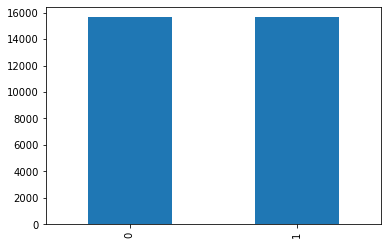

In [31]:
clean_df["act_score"].value_counts().plot(kind="bar")

In [74]:
# get_dummies for train data
X_dum = pd.get_dummies(clean_df)
X_dum.head(2)

,dist.m.,season,Race_Money,pos,age,lbs,ts,act_score,prize_money,course_Aintree,...,gear_htb,gear_htp,gear_hv,gear_p,gear_t,gear_tb,gear_tp,gear_tv,gear_v,gear_vp
3,3200,5,12532.0,1.0,4,161,33.0,1,8983.0,0,...,0,0,0,0,1,0,0,0,0,0
11,4000,5,14460.0,1.0,4,156,83.0,1,10365.0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_dum.columns

Index(['dist.m.', 'season', 'Race_Money', 'pos', 'age', 'lbs', 'ts',
       'act_score', 'prize_money', 'course_Aintree',
       ...
       'gear_htb', 'gear_htp', 'gear_hv', 'gear_p', 'gear_t', 'gear_tb',
       'gear_tp', 'gear_tv', 'gear_v', 'gear_vp'],
      dtype='object', length=2916)

In [34]:
X_dum.nunique()

dist.m.         43
season          15
Race_Money    2029
pos             28
age             14
              ... 
gear_tb          2
gear_tp          2
gear_tv          2
gear_v           2
gear_vp          2
Length: 2916, dtype: int64

In [75]:
X.head(2)

,course,band,dist.m.,going,season,race_group,race_type,Race_Money,trainer,jockey,pos,age,lbs,gear,ts,prize_money
3,Cork,4-5yo,3200,Heavy,5,Hurdle,Handicap,12532.0,other,Davy Russell,1.0,4,161,t,33.0,8983.0
11,Navan,4yo+,4000,Soft,5,Hurdle,Handicap,14460.0,C Byrnes,Davy Russell,1.0,4,156,b,83.0,10365.0


In [60]:
X['course'].value_counts()

Uttoxeter       980
Fontwell        937
Punchestown     903
Newton-Abbot    883
Worcester       850
               ... 
Bellewstown     191
Lingfield       156
Folkestone      149
Tralee           37
Windsor          10
Name: course, Length: 67, dtype: int64

# Machine Learning Model

In [44]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
  dist = v/ len(y)*100
  print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=15640 (50.0%)
Class=0, n=15640 (50.0%)


<BarContainer object of 2 artists>

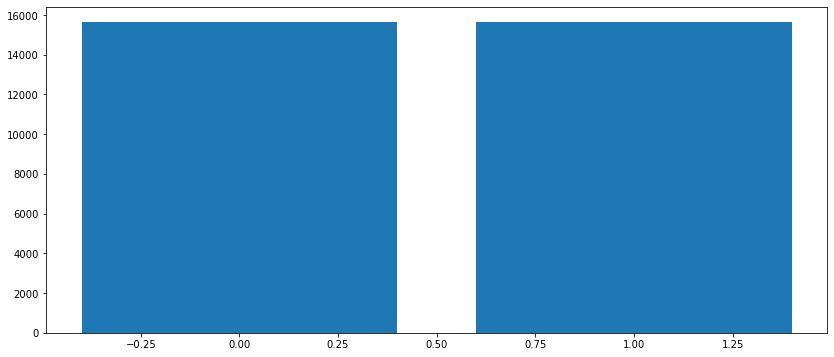

In [45]:
plt.figure(1, figsize=(14,6))
plt.bar(counter.keys(),counter.values())

In [46]:
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [76]:
X_dum.head(2)

,dist.m.,season,Race_Money,pos,age,lbs,ts,act_score,prize_money,course_Aintree,...,gear_htb,gear_htp,gear_hv,gear_p,gear_t,gear_tb,gear_tp,gear_tv,gear_v,gear_vp
3,3200,5,12532.0,1.0,4,161,33.0,1,8983.0,0,...,0,0,0,0,1,0,0,0,0,0
11,4000,5,14460.0,1.0,4,156,83.0,1,10365.0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Use sklearn to split dataset
# Use sklearn to split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_label, train_size = 0.6, random_state=1)

In [80]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
X_train_scaled

array([[-1.13333911,  1.15474126, -0.25146247, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [ 1.23457276, -0.21896782, -0.25146247, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [-1.13333911,  1.97896671, -0.15854371, ..., -0.10430773,
        -0.219942  ,  0.        ],
       ...,
       [-1.13333911,  0.33051581, -0.25790202, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [ 0.05061683, -1.5926769 , -0.02815028, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [-0.83735012, -1.5926769 , -0.34150089, ..., -0.10430773,
        -0.219942  ,  0.        ]])

In [82]:
X_test_scaled

array([[-0.68935563,  0.60525763, -0.25146247, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [-0.24537215, -0.76845145, -0.1255673 , ..., -0.10430773,
        -0.219942  ,  0.        ],
       [-0.98534461, -0.21896782, -0.2836602 , ..., -0.10430773,
        -0.219942  ,  0.        ],
       ...,
       [-1.13333911,  0.33051581, -0.16813527, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [ 0.19861132, -0.21896782, -0.31585792, ..., -0.10430773,
        -0.219942  ,  0.        ],
       [-1.13333911, -1.04319327, -0.22251627, ..., -0.10430773,
        -0.219942  ,  0.        ]])

## Logistic Regression

In [83]:
classifier = LogisticRegression(fit_intercept=True, random_state=1, max_iter = 400,verbose=0, multi_class='auto')
classifier.fit(X_train_scaled,y_train)
classifier.score(X_train_scaled,y_train)
classifier.score(X_test_scaled,y_test)

1.0

In [84]:
print(f"Training Scaled Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Test  Scaled Data Score: {classifier.score(X_test_scaled,y_test)}")

Training Scaled Data Score: 1.0
Test  Scaled Data Score: 1.0


# Decision Tree Classifier

In [85]:
model = DecisionTreeClassifier()
scores = cross_validate(model, X_train_scaled,y_train, cv=6, n_jobs=-1, scoring='f1_macro')

In [86]:
scores

{'fit_time': array([68.57682514, 68.89664245, 94.73043275, 68.01414704, 26.42853189,
        25.64824796]),
 'score_time': array([0.34381986, 0.14306521, 0.11892915, 0.23886228, 0.08595133,
        0.05197835]),
 'test_score': array([1., 1., 1., 1., 1., 1.])}

# RandomForestClassifier

In [87]:
model_r =RandomForestClassifier(n_estimators = 20, max_features='auto')

In [90]:
model_r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [92]:
model_r.score(X_train,y_train)

1.0

In [94]:
model_r.score(X_test,y_test)

1.0

In [96]:
y_predicted = model_r.predict(X_test)
y_predicted

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [98]:
# Optional : using confusion matrix to confirm RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted )
cm

array([[6131,    0],
       [   0, 6381]], dtype=int64)

Text(69.0, 0.5, 'Truth')

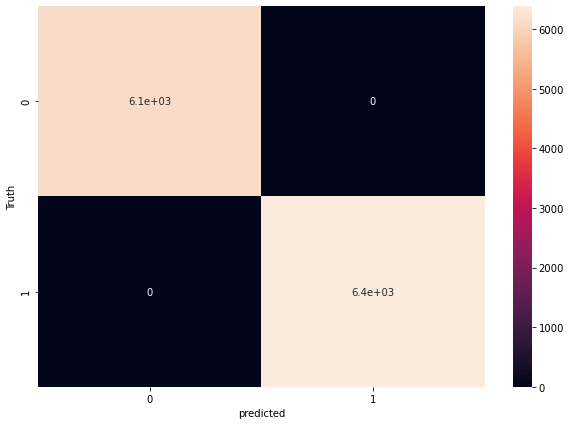

In [99]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [101]:
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [102]:
print(metrics.classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6131
           1       1.00      1.00      1.00      6381

    accuracy                           1.00     12512
   macro avg       1.00      1.00      1.00     12512
weighted avg       1.00      1.00      1.00     12512

